## Predictor Corrector Method

In [56]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

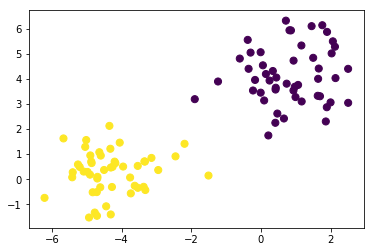

In [322]:
X, y = make_blobs(n_samples=100, centers=2, random_state=3)
y[np.where(y==0.0)]=-1

# We'll solve primal SVM optimization problem for linear case
# Refer to CS229 Andrew Ng course for SVM formulation

# min (1/2)W.T*W
# s.t. yi*(W.T*xi + 1) >= 1

# Prepare the matrices
G = 2*np.matrix([[1, 0],[0, 1]])
g = np.matrix([[0],[0]])
A = np.matrix((X*y.reshape(-1,1)).T)
x, z, s = np.matrix([[0.1],[0.1]]),np.matrix([[0.1]*len(X)]).T,np.matrix([[0.1]*len(X)]).T
b = np.matrix(1 - y).T
plt.scatter(X[:, 0], X[:, 1], s=50,c=y)

In [318]:
def _cvxopt(x, z, s, G, g, A, b):
    
    # Input to the solver:
    # x : Primary variables of which we have to find the optimal value size: 
    # z : Lagrangian variables
    # s : Slack variables
    # G :
    
    eta = 0.60
    
    #compute the residuals
    
    mA, nA = A.shape[0], A.shape[1]
    
    e = np.matrix(np.ones((nA,1)))
    
    rL = G*x + g - A*z
    rs = s - A.T*x + b
    rsz = np.multiply(s,z)
    mu = np.sum(np.multiply(z,s))/nA
    
    # number of iteration, epsilon, tolerance
    
    k = 0
    maxk = 300
    eps_L = 1e-16
    eps_s = 1e-16
    eps_mu = 1e-16
    
    while (k <= maxk and np.linalg.norm(rL)>=eps_L and np.linalg.norm(rs)>=eps_s and abs(rsz).all()>=eps_mu):
        
        # solve the sytem of equation : predictor step
        
        G_bar = G + A*(np.diag((z/s).A1))*A.T
        r_bar = A*((rsz - np.multiply(z,rs))/s)
        g_bar = -1*(rL + r_bar)
        L = np.linalg.cholesky(G_bar)
        
        dx_a = np.linalg.inv(L.T)*(np.linalg.inv(L)*g_bar)
        ds_a = -1*rs + A.T*dx_a
        dz_a = -1*(rsz + np.multiply(z,ds_a))/s
        
        # compute alpha_aff
        
        alpha_a = 1
        
        idx_z = np.where(dz_a < 0)
        
        if (len(idx_z[0])!=0):
            alpha_a =  min(alpha_a, np.min(-z[idx_z]/dz_a[idx_z]))
            
        idx_s = np.where(ds_a < 0)
        
        if (len(idx_s[0])!=0):
            alpha_a =  min(alpha_a, np.min(-s[idx_s]/ds_a[idx_s]))
        
        mu_a = (s + alpha_a*ds_a).T*((z + alpha_a*dz_a))/nA
        
        sigma = np.linalg.matrix_power(mu_a/mu,3)
        
        
        # solve the sytem of equation : corrector step
        
        rsz = rsz + np.multiply(ds_a,dz_a) - sigma[0,0]*mu*e
        r_bar = A*((rsz - np.multiply(z,rs))/s)
        g_bar = -(rL + r_bar)
        dx = np.linalg.inv(L.T)*(np.linalg.inv(L)*g_bar)
        ds = -rs + A.T*dx_a
        dz = -(rsz + np.multiply(z,ds_a))/s 
        
        # compute alpha
        
        alpha = 1
        
        idx_z = np.where(dz < 0)
        
        if (len(idx_z[0])!=0):
            alpha =  min(alpha, np.min(-z[idx_z]/dz[idx_z]))
            
        idx_s = np.where(ds < 0)
        
        if (len(idx_s[0])!=0):
            alpha =  min(alpha, np.min(-s[idx_s]/ds[idx_s]))
            
        # Update x, z, s
  
        x = x + eta*np.multiply(alpha,dx)
        z = z + eta*np.multiply(alpha,dz)
        s = z + eta*np.multiply(alpha,ds)
        
        k = k+1
        
        # Update rhs and mu
        
        rL = G*x + g - A*z
        rs = s - A.T*x + b
        rsz = np.multiply(s,z)
        mu = np.sum(np.multiply(z,s))/nA
        
    return x

In [323]:
w = _cvxopt(x, z, s, G, g, A, b)

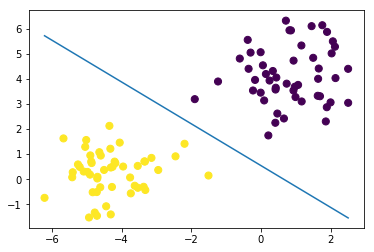

In [324]:
plt.figure()
x=np.linspace(min(X[:, 0]), max(X[:, 0]), num=100)
Y=(-(w[0,0])*x-1)/(w[1,0])
plt.scatter(X[:, 0], X[:, 1], s=50,c=y)
plt.plot(x,Y.T)
plt.show()

In [196]:
G = 2*np.matrix([[3, 2],[0,1]])
g = np.matrix([[1],[6]])
A = np.matrix([[2],[3]])
x, z, s = np.matrix([[0.1],[0.1]]),np.matrix([[0.1]]),np.matrix([[0.1]])
b = np.matrix([[4]])